In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import typing

In [2]:
raw_Rt = pd.read_csv("data/r_estimates.csv", parse_dates=["Date"], index_col="Date")
raw_confirmed = pd.read_csv("data/confirmed.csv")

In [3]:
temp = raw_confirmed[raw_confirmed["Country/Region"] == "United Kingdom"]
temp[temp["Province/State"].isna()]
# temp[["Province/State"]]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21
269,NaN,United Kingdom,55.3781,-3.436,0.0,0.0,0.0,0.0,0.0,0.0,...,5332371.0,5386340.0,5433939.0,5473477.0,5519602.0,5563006.0,5602321.0,5637975.0,5669260.0,5697912.0


In [4]:
def process(name: typing.Tuple[str],
            Rt_country: typing.Dict[str, pd.DataFrame],
            confirmed_country: typing.Dict[str, pd.DataFrame]) -> typing.Tuple[typing.Dict[str, pd.DataFrame]]:
    #* Reproduction number
    df = raw_Rt[raw_Rt["Code"] == name[0]]
    df = df.drop(["Code", "EnoughData"], axis=1)
    df.columns = ["mean", "std"]
    Rt_country[name[1]] = df

    #* Confirmed cases
    df = raw_confirmed[raw_confirmed["Country/Region"] == name[1]]
    df = df[df["Province/State"].isna()]
    df = df.drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1)
    df = df.transpose()
    df.index = pd.to_datetime(df.index)
    df.columns = ["cumulative"]
    daily = np.array(df["cumulative"], dtype=np.int32)[1:] - np.array(df["cumulative"], dtype=np.int32)[:-1]
    daily = np.concatenate(([1], daily))
    df["daily"] = daily
    confirmed_country[name[1]] = df

    return Rt_country, confirmed_country


In [5]:
Rt_country = {}
confirmed_country = {}

In [6]:
#* Korea
Rt_country, confirmed_country = process(("KR", "Korea, South"), Rt_country, confirmed_country)

#* USA
Rt_country, confirmed_country = process(("US", "US"), Rt_country, confirmed_country)

#* Japan
Rt_country, confirmed_country = process(("JP", "Japan"), Rt_country, confirmed_country)

#* Spain
Rt_country, confirmed_country = process(("ES", "Spain"), Rt_country, confirmed_country)

#* India
Rt_country, confirmed_country = process(("ID", "India"), Rt_country, confirmed_country)

#* United Kingdom
Rt_country, confirmed_country = process(("GB", "United Kingdom"), Rt_country, confirmed_country)

#* Finland
Rt_country, confirmed_country = process(("FI", "Finland"), Rt_country, confirmed_country)

#* New Zealand
Rt_country, confirmed_country = process(("NZ", "New Zealand"), Rt_country, confirmed_country)

#* Denmark
Rt_country, confirmed_country = process(("DK", "Denmark"), Rt_country, confirmed_country)

#* France
Rt_country, confirmed_country = process(("FR", "France"), Rt_country, confirmed_country)

#* Greece
Rt_country, confirmed_country = process(("GR", "Greece"), Rt_country, confirmed_country)

#* Italy
Rt_country, confirmed_country = process(("IT", "Italy"), Rt_country, confirmed_country)

#* Norway
Rt_country, confirmed_country = process(("NO", "Norway"), Rt_country, confirmed_country)

#* Poland
Rt_country, confirmed_country = process(("PL", "Poland"), Rt_country, confirmed_country)

#* Russia
Rt_country, confirmed_country = process(("RU", "Russia"), Rt_country, confirmed_country)



In [7]:
def plot(name:str, ax) -> None:
    confirmed = confirmed_country[name]
    Rt = Rt_country[name]
    Rt.index = Rt.index.tz_localize(None)
    ax1 = ax.twinx()
    ax1.bar(confirmed.index, confirmed["daily"], align='center', width=1.0, alpha=0.4, color='cornflowerblue')
    ax1.set_ylabel("daily confirmed", fontsize=20)
    ax1.tick_params(axis='y', labelsize=15)
    temp = confirmed[Rt.index[0] : Rt.index[-1]]
    max_confirmed = np.max(temp["daily"])
    ax1.set_ylim([0, max_confirmed * 1.2])

    ax.plot(Rt.index, Rt["mean"], color='k')
    ax.fill_between(x = Rt.index,
                    y1 = Rt["mean"] - Rt["std"],
                    y2 = Rt["mean"] + Rt["std"],
                    color='limegreen', alpha=0.6)
    ax.axhline(1, color='r')
    ax.set_xlim(Rt.index[0], Rt.index[-1])
    ax.tick_params(axis='both', labelsize=15)
    ax.set_ylabel("Rt", fontsize=20)
    ax.set_xlabel("Date", fontsize=20)
    ax.set_title(name, fontsize=25)


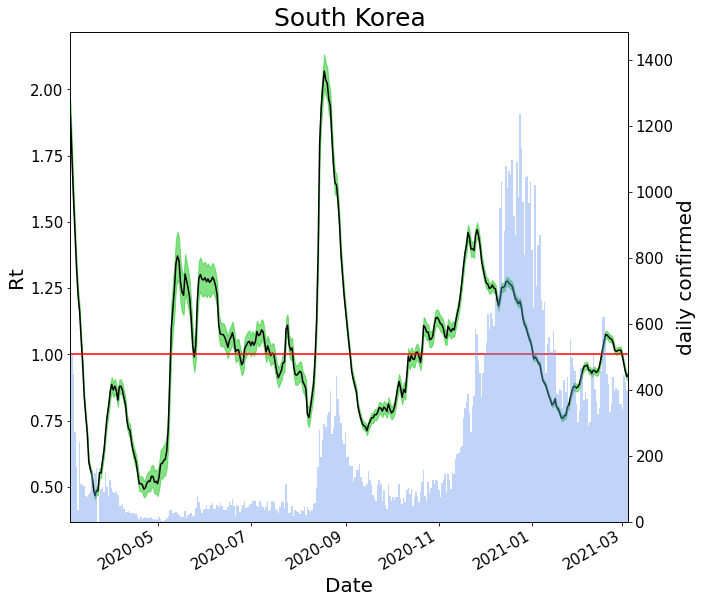

In [9]:
country = "Korea, South"
fig, ax = plt.subplots(figsize=(10,10))
plot(country, ax)
ax.set_title("South Korea", fontsize=25)
fig.autofmt_xdate()

fig.savefig("fig/Korea.png", facecolor='w')
# fig.show()



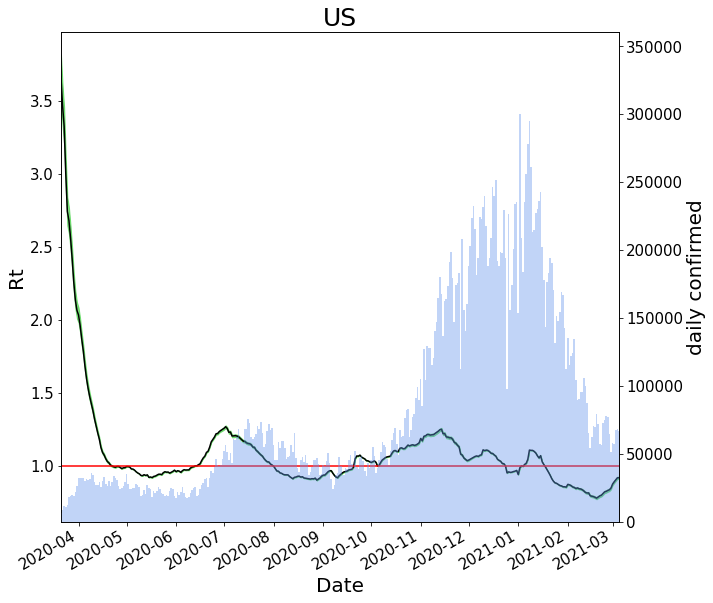

In [12]:
country = "US"
fig, ax = plt.subplots(figsize=(10,10))
plot(country, ax)

fig.autofmt_xdate()
fig.savefig("fig/USA.png", facecolor='w')

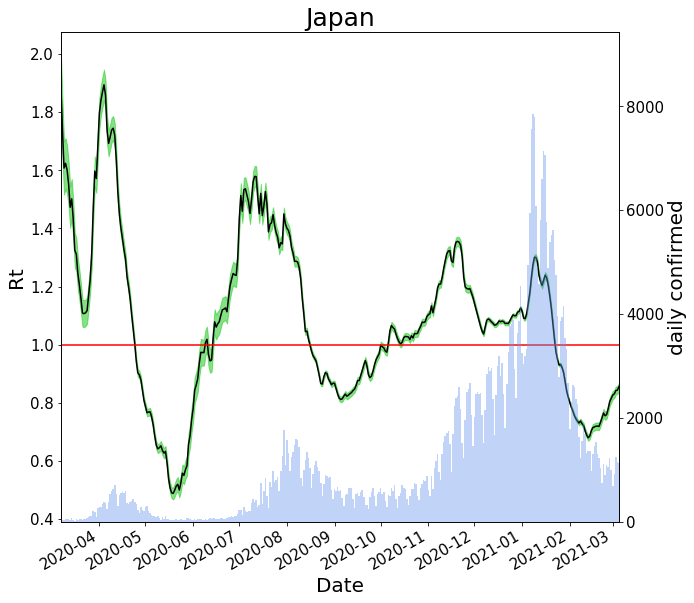

In [13]:
country = "Japan"
fig, ax = plt.subplots(figsize=(10,10))
plot(country, ax)

fig.autofmt_xdate()
fig.savefig("fig/" + country + ".png", facecolor='w')

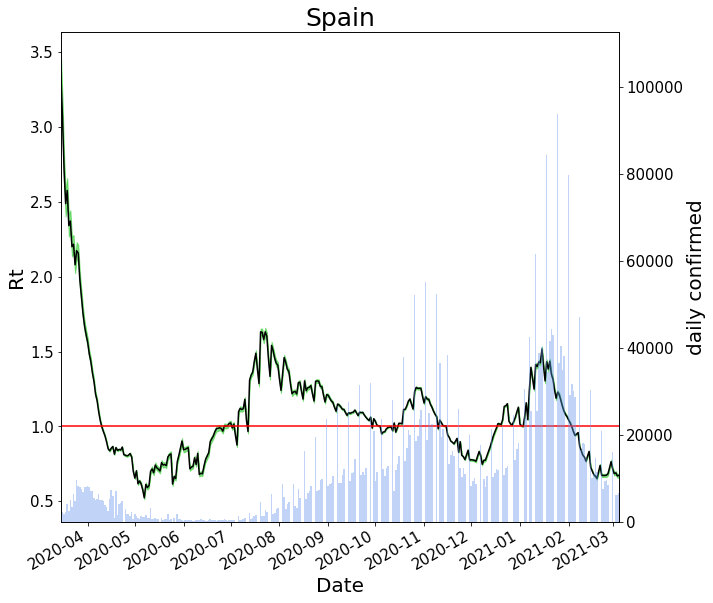

In [14]:
country = "Spain"
fig, ax = plt.subplots(figsize=(10,10))
plot(country, ax)

fig.autofmt_xdate()
fig.savefig("fig/" + country + ".png", facecolor='w')

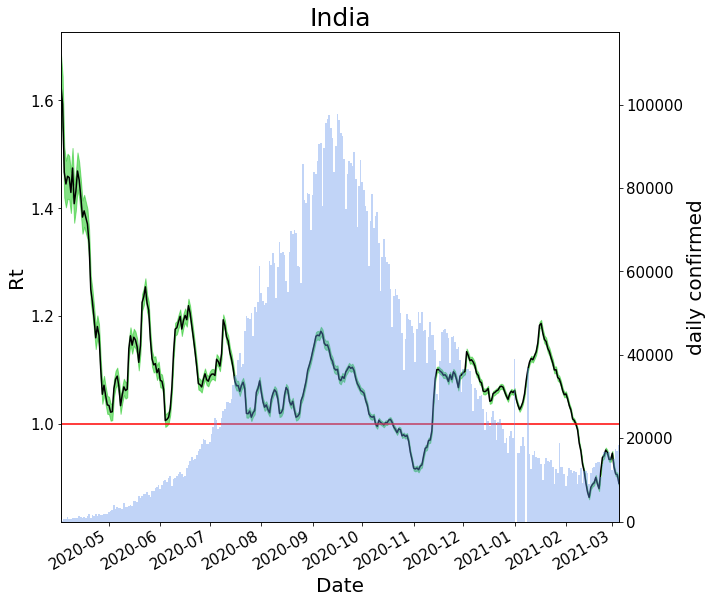

In [15]:
country = "India"
fig, ax = plt.subplots(figsize=(10,10))
plot(country, ax)

fig.autofmt_xdate()
fig.savefig("fig/" + country + ".png", facecolor='w')

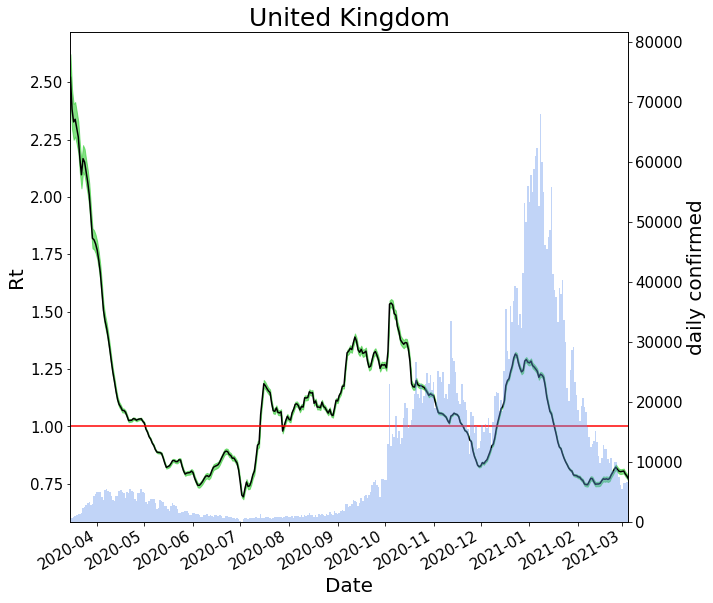

In [16]:
country = "United Kingdom"
fig, ax = plt.subplots(figsize=(10,10))
plot(country, ax)

fig.autofmt_xdate()
fig.savefig("fig/" + country + ".png", facecolor='w')

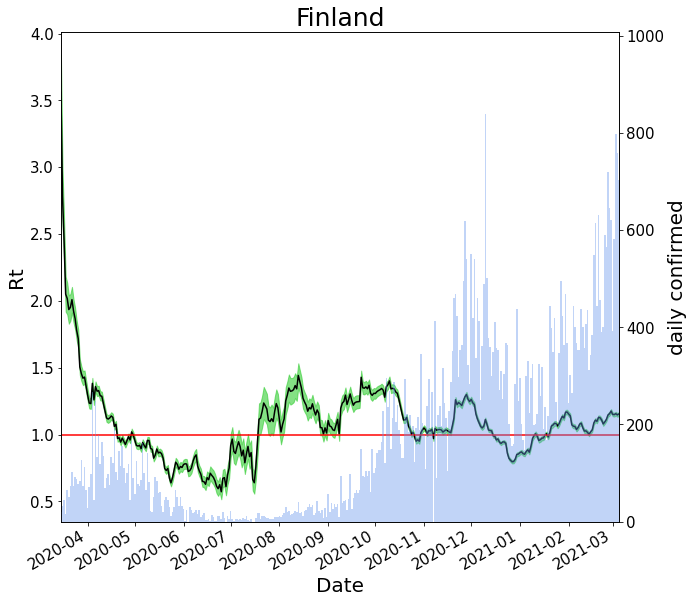

In [17]:
country = "Finland"
fig, ax = plt.subplots(figsize=(10,10))
plot(country, ax)

fig.autofmt_xdate()
fig.savefig("fig/" + country + ".png", facecolor='w')

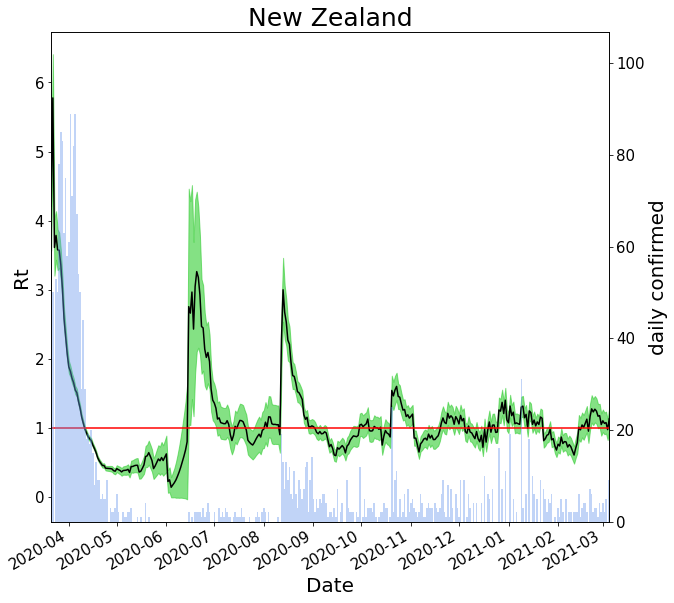

In [18]:
country = "New Zealand"
fig, ax = plt.subplots(figsize=(10,10))
plot(country, ax)

fig.autofmt_xdate()
fig.savefig("fig/" + country + ".png", facecolor='w')

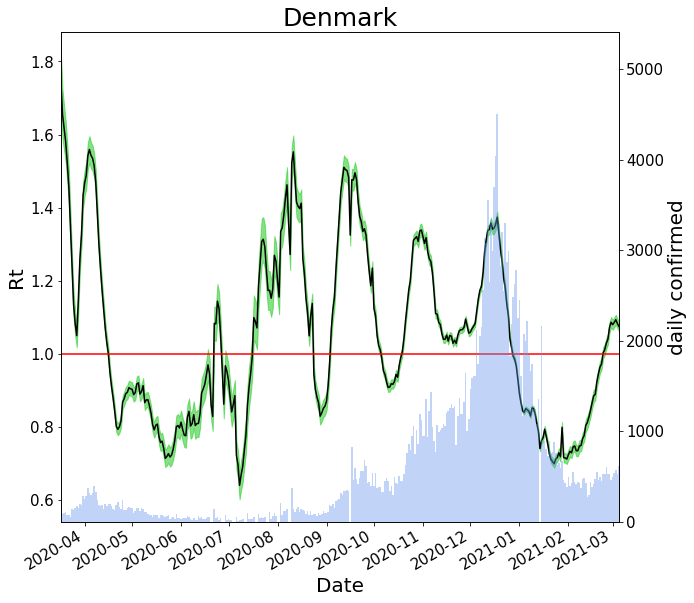

In [19]:
country = "Denmark"
fig, ax = plt.subplots(figsize=(10,10))
plot(country, ax)

fig.autofmt_xdate()
fig.savefig("fig/" + country + ".png", facecolor='w')

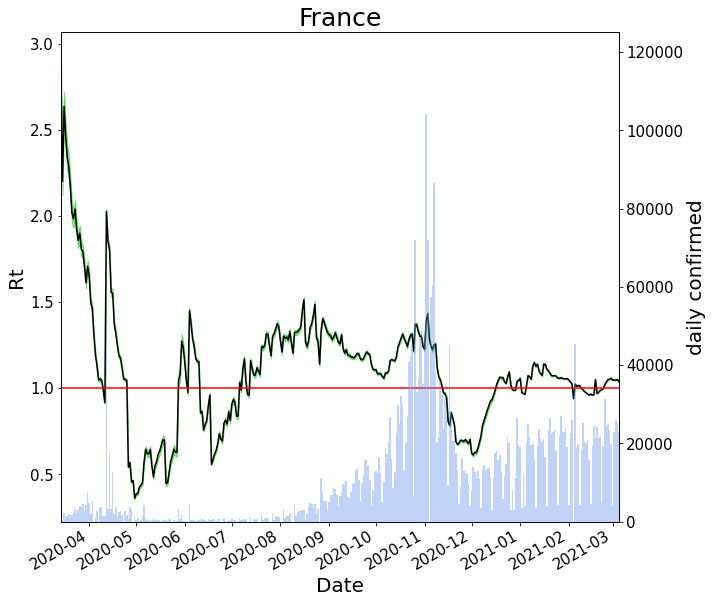

In [20]:
country = "France"
fig, ax = plt.subplots(figsize=(10,10))
plot(country, ax)

fig.autofmt_xdate()
fig.savefig("fig/" + country + ".png", facecolor='w')

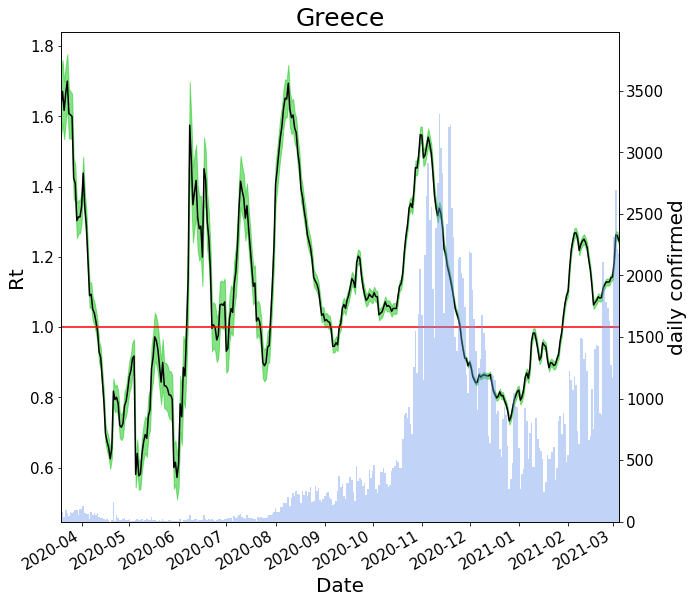

In [21]:
country = "Greece"
fig, ax = plt.subplots(figsize=(10,10))
plot(country, ax)

fig.autofmt_xdate()
fig.savefig("fig/" + country + ".png", facecolor='w')

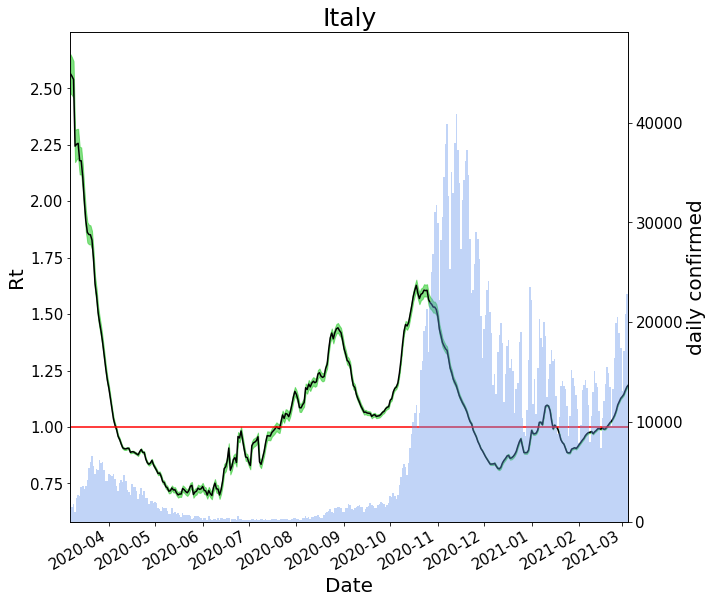

In [22]:
country = "Italy"
fig, ax = plt.subplots(figsize=(10,10))
plot(country, ax)

fig.autofmt_xdate()
fig.savefig("fig/" + country + ".png", facecolor='w')

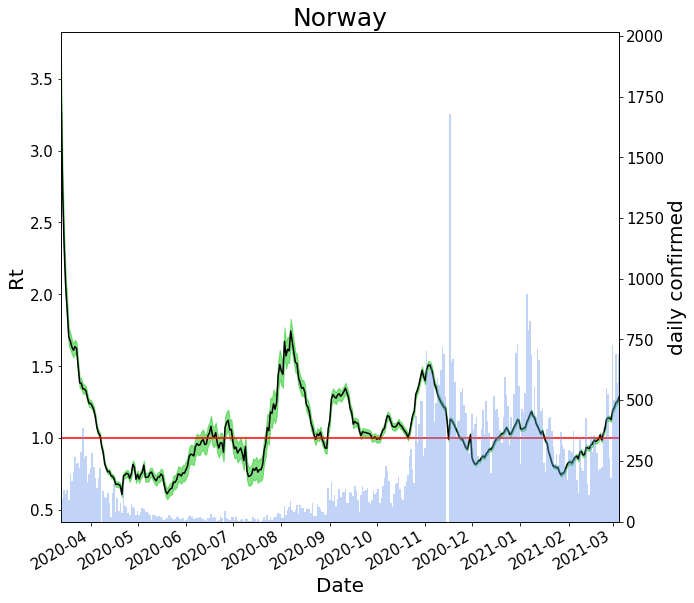

In [23]:
country = "Norway"
fig, ax = plt.subplots(figsize=(10,10))
plot(country, ax)

fig.autofmt_xdate()
fig.savefig("fig/" + country + ".png", facecolor='w')

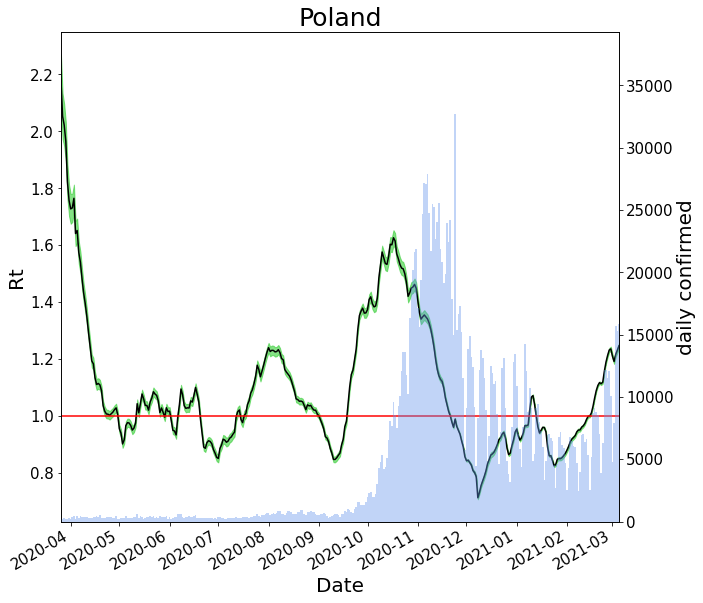

In [24]:
country = "Poland"
fig, ax = plt.subplots(figsize=(10, 10))
plot(country, ax)

fig.autofmt_xdate()
fig.savefig("fig/" + country + ".png", facecolor='w')


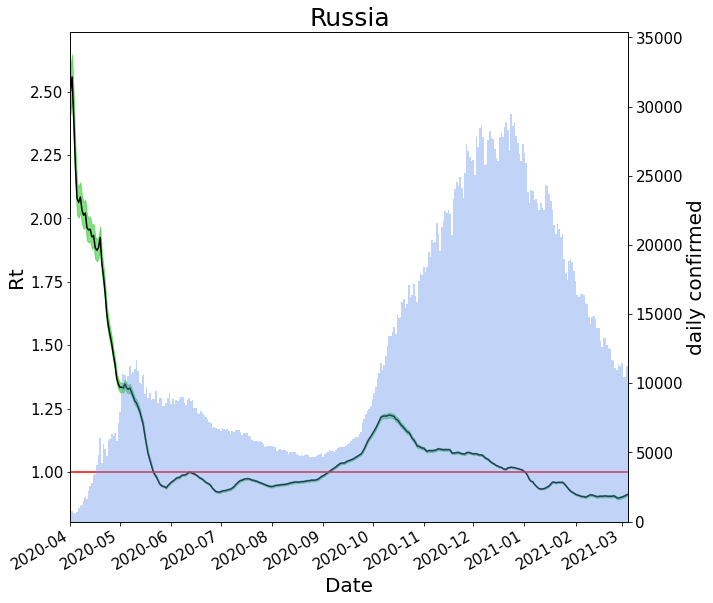

In [25]:
country = "Russia"
fig, ax = plt.subplots(figsize=(10,10))
plot(country, ax)

fig.autofmt_xdate()
fig.savefig("fig/" + country + ".png", facecolor='w')